In [84]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers
import random

In [85]:
dataset_dir = "Datasets/cifar10_dataset"

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [87]:
datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split = 0.2
)

In [88]:
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size = (32,32),
    batch_size = 64,
    subset="training",
    class_mode='categorical'
)


Found 48000 images belonging to 10 classes.


In [89]:
validation_data = datagen.flow_from_directory(
    dataset_dir,
    target_size = (32,32),
    batch_size = 32,
    subset="validation",
    class_mode='categorical'
)

Found 12000 images belonging to 10 classes.


In [90]:
model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 397,802 (1.52 MB)

 Trainable params: 397,802 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.compile(
    optimizer = optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
             )

In [92]:
history= model.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data= validation_data
    
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 191s 251ms/step - accuracy: 0.2418 - loss: 2.0726 - val_accuracy: 0.3154 - val_loss: 1.9061
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3154 - val_loss: 1.9084
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 164s 218ms/step - accuracy: 0.3254 - loss: 1.8908 - val_accuracy: 0.3438 - val_loss: 1.8297
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3475 - val_loss: 1.8336
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 200s 250ms/step - accuracy: 0.3517 - loss: 1.8179 - val_accuracy: 0.3594 - val_loss: 1.7927
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3658 - val_loss: 1.7874
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 180s 240ms/step - accuracy: 0.3703 - loss: 1.7757 - val_accuracy: 0.3707 - val_loss: 1.7679
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - ac

In [93]:
loss, accuracy = model.evaluate(validation_data)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.3889 - loss: 1.7215
Validation Loss: 1.7295221090316772
Validation Accuracy: 0.38358333706855774


In [94]:
# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


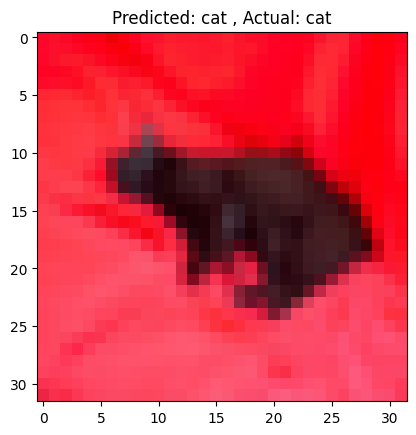

In [95]:
from tensorflow.keras.preprocessing import image
def display_predict(img_path, actual_label):
    img=image.load_img(img_path, target_size=(32,32))
    img_array=image.img_to_array(img)/255.0
    img_array=np.expand_dims(img_array, axis=0)

    pred=model.predict(img_array)
    pred=np.argmax(pred)

    pred_class=class_names[pred]
  

    plt.imshow(img)
    plt.title(f"Predicted: {pred_class} , Actual: {actual_label}")

display_predict("Datasets/cifar10_dataset/3/image_21.png", "cat")

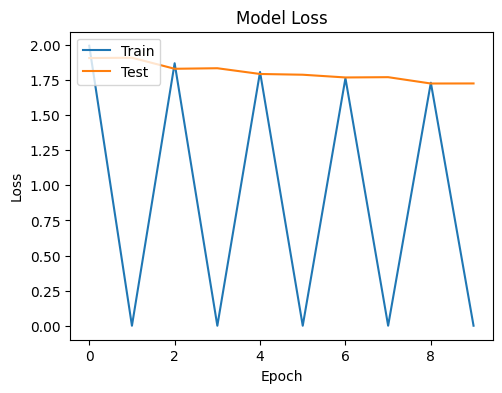

In [96]:
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


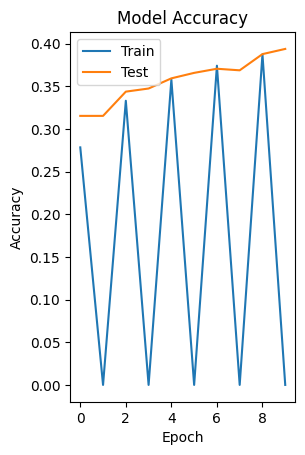

In [97]:
# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [62]:
red_channel = train.iloc[7][:1024].values.reshape(32, 32)
green_channel = train.iloc[7][1024:2048].values.reshape(32, 32)
blue_channel = train.iloc[7][2048:3072].values.reshape(32, 32)

In [63]:
image = np.dstack((red_channel, green_channel, blue_channel)).astype(np.uint8)

8


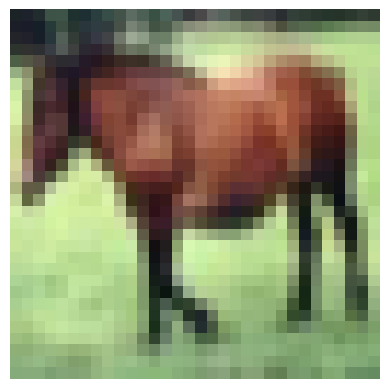

In [64]:
plt.imshow(image)
plt.axis('off')  # Hide axes
print(np.argmax(pred[7]))
plt.show()